# Scientific Python Tutorial

This is a tutorial for [Scientific Python (Scipy)](http://scipy.org/), a scientific computing module for the [Python programming language](http://python.org/). The goal of this tutorial to provide a "walkthrough", guiding you through the steps of writing some basic but complete Scipy programs. It assumes no pre-existing knowledge of the Python programming language; programming language constructs are explained as they appear.

For a more complete exploration of Scipy, there are a couple of other excellent introductions available online:

* [Scipy Tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/general.html): the official tutorial.
* [Scipy Lecture Notes](http://scipy-lectures.github.io/): a textbook which goes in-depth into using Scipy.

## Preliminaries

### Jupyter web notes

This tutorial runs on a [Jupyter](http://jupyter.org/) web notebook. Further down, you will see "cells" containing Python code that you can edit. Each cell can be executed by selecting it with a mouse click, then using the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar. The Python code in the cell will run on the server, and the results will be displayed in your web browser. This allows you to go through the tutorial entirely within the web browser.

### Installing Python and Scipy on your own computer

Instead of running the code examples in the Jupyter notebook, you may wish to run the Python code examples on your own computer. (You'll need to do that anyway, to complete the course assignments.) For this, [Python](http://python.org/) and [Scipy](http://scipy.org/) need to be installed.

* If you are using GNU/Linux, Python is probably already installed, so just install Scipy using the package manager (e.g. <code>apt-get install scipy</code> for Debian or Ubuntu). Be sure to choose the Python 3.x option, not the Python 2.x version.
* Alternatively, you can install the [Anaconda distribution](https://www.continuum.io/downloads), which bundles Python, Scipy, and some other useful libraries. Anaconda is available for all major operating systems.  Again, be sure to choose the Python 3.x option, not the Python 2.x version.
* If you don't want to use Anaconda, here are local mirrors of Windows installers for Python and Scipy: (i) install  [python-3.4.2.amd64.msi](http://web.spms.ntu.edu.sg/~ydchong/python-3.4.2.amd64.msi) ([original source](http://python.org/download/)); (ii) next, install [Scipy-stack-14.8.27.win-amd64-py3.4.exe](http://web.spms.ntu.edu.sg/~ydchong/Scipy-stack-14.8.27.win-amd64-py3.4.exe) ([original source](http://www.lfd.uci.edu/~gohlke/pythonlibs/#scipy-stack)).

***This tutorial will assume you are using Python 3.*** It is possible to use Scipy with Python 2, but you'll encounter lots of little differences, too many and annoying to enumerate. It is recommended for all new Python code to use Python 3.

Next, you should make sure that Python and Scipy are installed correctly. If you are using GNU/Linux, open up a text terminal and type <code>python</code>. If you are using Windows, launch the program <code>Python 3.x &rarr; IDLE (Python GUI)</code>.  In both case, this will open up a text terminal with contents looking like this:

    Python 3.5.2 (default, Jun 28 2016, 08:46:01) 
    [GCC 6.1.1 20160602] on linux
    Type "help", "copyright", "credits" or "license" for more information.
    >>>

The <code>>>></code> part is a command prompt. Type the following at this prompt:

    >>> from scipy import *

After pressing Enter, there should be a brief pause, after which you get back to the prompt. This means that Scipy was loaded without any error.  If you saw a message like <code>ImportError: No module named 'scipy'</code>, that means Scipy was somehow not installed correctly.

Next, type this:

    >>> import matplotlib.pyplot as plt

Again, there should be no error message.  These two commands initialize the Scipy scientific computing module, and the Matplotlib plotting module, so that they are now available for use in Python.

Note: in the future, there is no need to type these lines in by hand each time you start Python. These and other initialization lines will be placed in the program source code.

## A very simple Scipy program  

Let's get started with a simple plot of $y = \sin(x)$.  Below, you should see a cell containing some Python code.  Select the cell with a mouse click, then run it by using the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar. This should display a graph of the sine function.

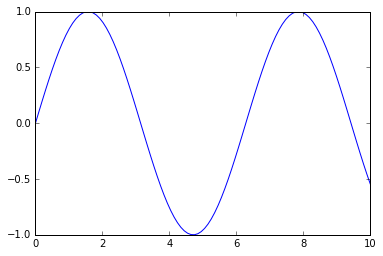

In [4]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

x = linspace(0, 10, 100)
y = sin(x)
plt.plot(x,y)
plt.show()

If you are running the Python code on your own computer (rather than using the Jupyter web notebook), type the lines of code into the Python command prompt, one at a time. However, ***omit the first line*** (<code>%matplotlib inline</code>).  That line controls how the plot is displayed in the web browser, and it's meaningless outside of a Jupyter notebook.

After the <code>%matplotlib inline</code> indicator, the next two lines of code import the <code>scipy</code> and <code>matplotlib.pyplot</code> modules, so that they can be used in the program. We will explain how these "import" lines work later. For now, just note that these two lines will be present at the top of every program that we write.

The following four lines of code are the ones that do the actual work. Here is what they do:

* Create an array (a sequence of numbers), consisting of 100 numbers between 0 and 10, inclusive.  Give this array the name <code>x</code>.
* Create an array whose elements are the sines of the elements in <code>x</code>.  This is a sequence of 100 numbers, the first being $\sin(0)$ and the last being $\sin(10)$.  Give this array the name <code>y</code>.
* Create a plot, using <code>x</code> as the set of horizontal coordinates, and <code>y</code> as the set of vertical coordinates.
* Display the plot.

If you don't understand *why* the above lines do what they do, don't worry.  Let's just keep going for now.

## Getting started: computing electric potentials

Let's now walk through the steps of writing a program to perform a simple task: computing and plotting the electric potential of a set of point charges.

Suppose we have a set of $N$ point charges distributed in 1D.  Let the positions of the particles be $\{x_0, x_1, \cdots, x_{N-1}\}$, and their electric charges be $\{q_0, q_1, \cdots, q_{N-1}\}$.  (Note that we have chosen to start counting from zero, so that $x_0$ is the first position and $x_{N-1}$ is the last position.) Knowing the positions and charges, we can calculate $\phi(x)$ at any arbitrary point $x$, by using the formula

$$\phi(x) = \sum_{j=0}^{N-1} \frac{q_j}{4 \pi \epsilon_0 |x-x_j|}.$$

The factor of $4 \pi \epsilon_0$ in the denominator is annoying to keep around, so we will adopt "computational units" by rescaling the potential, positions and/or the charges so that $4 \pi \epsilon_0 = 1$.  Then the formula for the potential simplifies to

$$\phi(x) = \sum_{j=0}^{N-1} \frac{q_j}{|x-x_j|}.$$

Our goal is to write a program that takes a set of positions and charges as its input, and plots the electric potential $\phi(x)$ versus $x$.

### A first pass

Let's do a very crude "first pass" at the program.  Instead of handling an arbitrary number of particles, let's assume there's a *single* particle with some position $x_0 = 1.5$ and charge $q_0 = 1.0$.  Then we'll plot its potential.

The code to do this is shown below.  You can select the cell with a mouse click, then run it by using the keyboard shortcut <code>Ctrl-Enter</code>, or the menu option <code>Cell &rarr; Run Cells</code>, or the <code>Run Cell</code> button on the tool-bar.

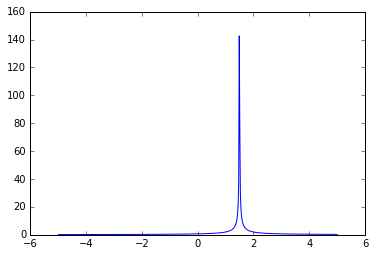

In [7]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

x0 = 1.5
q0 = 1.0

x   = linspace(-5.0, 5.0, 500)
phi = q0 / abs(x - x0)

plt.plot(x, phi)
plt.show()

The program creates two variables <code>x0</code> and <code>q0</code>, assigning them fixed values.  Next, it creates an array named <code>x</code>, using the <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code> function; this array consists of 500 numbers between -5 and 5, inclusive.  It then creates an array named <code>phi</code>, whose values are calculated using <code>q0</code>, <code>x0</code>, and <code>x</code> based on the formula for the electrostatic potential.

The final two lines create a plot of <code>phi</code> versus <code>x</code>, and display the plot.  The result is pretty much what we expect: the potential is peaked at $X = 1.5$, the position of the particle (the value of <code>x0</code>). Since the charge of the particle is assigned a positive value (1.0), the potential is positive.

### Writing a Python file and running it on your own computer (optional)

If you have Scipy installed, you should try running the above program on your own computer. To do this, you must put the code into a file.
* Open [your preferred text editor](http://www.gnu.org/software/emacs/) and open an empty file, naming it <code>potentials.py</code>.
* Or, if you are using Windows, you can use the text editor bundled with Python; in the window opened by the <code>IDLE (Python GUI)</code> program, click on the menu-bar item <code>File &rarr; New File</code>; then type <code>Ctrl-s</code> (or click on <code>File &rarr; New File</code>) and save the empty file as <code>potentials.py</code>.

The file extension <code>.py</code> denotes it as a Python source code file.  You can place the file in any directory you like.

Next, copy the above Python code (omitting the <code>%matplotlib inline</code> line at the top) into <code>potentials.py</code>, and save it.  After saving, you can run the program.
* On GNU/Linux, open a text terminal and <code>cd</code> to the directory where the file is. Then type <code>python -i potentials.py</code>.
* On Windows, while in file-editing window type <code>F5</code> (or click on <code>Run</code> &rarr; <code>Run Module</code>).

In either case, the plot of $\phi(x)$ versus $x$ should be displayed.

After closing the figure, you will return to the Python command prompt. Note that Python is still running, even though your program has finished (if you ran Python from the text terminal, this is due to the <code>-i</code> option that you used to invoke Python). From the Python command prompt, you can examine the values of the variables which were created by your program, by typing their names into the command prompt.  For example,

    >>> x0
    1.5
    >>> phi
    array([ 0.15384615    0.15432194    0.15480068    0.1552824  ....
              ....        0.28902404    0.28735963    0.28571429 ])

The value of <code>x0</code> is a number, 1.5, which was assigned to it when our program ran.  The value of <code>phi</code> is more complicated: it is an **array**, which is a special data structure containing a sequence of numbers. From the command line, you can inspect the individual elements of this array.  For example, to see the value of the array's first element, type this:

    >>> phi[0]
    0.153846153846

As we've mentioned, index 0 refers to the *first* element of the array.  Similarly, index 1 refers to the second element of the array, index 2 refers to the third element, etc. You can also look at the length of the array, by calling the function <code>len</code>. This function accepts an array input and returns its length, as an integer.

    >>> len(phi)
    500

You can exit the Python command prompt at any time by typing <code>Ctrl-d</code> or <code>exit()</code>.

## Modularizing the code

### Designing a potential function<a name="potentialfunction"></a>

We could continue altering the above code in a straightforward way.  For example, we could add more particles by adding variables <code>x1</code>, <code>x2</code>, <code>q1</code>, <code>q2</code>, and so forth, and altering our formula for computing <code>phi</code>. However, this is not very satisfactory: each time we want to consider a new collection of particle positions or charges, or change the number of particles, we'd have to re-write the program's internal "logic"&mdash;i.e., the part that computes the potentials. In programming terminology, our program is insufficiently modular.

It would be better to isolate the part of the program that computes the potential from the part that specifies the numerical inputs to the calculation, like the positions and charges. To accomplish this, let's define a **function** to compute the potential of an *arbitrary* set of charged particles, sampled at an arbitrary set of positions. This function needs three sets of inputs:

* An array of particle positions $\vec{x} \equiv [x_0, \cdots, x_{N-1}]$. (Note: we are using these $N$ numbers to refer to the positions of $N$ particles in a 1D space, *not* the position of a single particle in an $N$-dimensional space.)
* An array of particle charges $\vec{q} \equiv [q_0, \cdots, q_{N-1}]$.
* An array of sampling points $\vec{X} \equiv [X_0, \cdots, X_{M-1}]$, which are the points where we want to know $\phi(X)$.

The number of particles, $N$, and the number of sampling points, $M$, should be arbitrary positive integers.  Furthermore, $N$ and $M$ need not be equal.

Using these inputs, our function must compute the array

$$\begin{bmatrix}\phi(X_0)\\ \phi(X_1) \\ \vdots \\ \phi(X_{M-1})\end{bmatrix},$$

which contains the value of the total electric potential at each of the sampling points.  The total potential can be written as the sum of contributions from all particles.  Let us define $\phi_j(x)$ as the potential produced by particle $j$:

$$\phi_j(x) \equiv \frac{q_j}{\left|x - x_j\right|}.$$

Then the total potential is

$$\begin{bmatrix}\phi(X_0)\\ \phi(X_1) \\ \vdots \\ \phi(X_{M-1})\end{bmatrix} = \begin{bmatrix}\phi_0(X_0)\\ \phi_0(X_1) \\ \vdots \\ \phi_0(X_{M-1})\end{bmatrix} + \begin{bmatrix}\phi_1(X_0)\\ \phi_1(X_1) \\ \vdots \\ \phi_1(X_{M-1})\end{bmatrix} + \cdots + \begin{bmatrix}\phi_{N-1}(X_0)\\ \phi_{N-1}(X_1) \\ \vdots \\ \phi_{N-1}(X_{M-1})\end{bmatrix}.$$

### The program

The following code implements this function, and uses it:<a name="example1"></a>

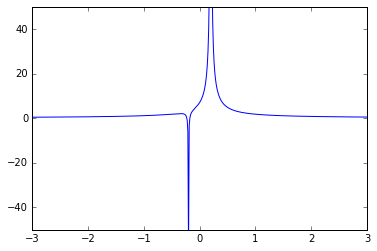

In [2]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Return the potential at measurement points x, due to particles
## at positions xc and charges qc.  xc, qc, and x must be 1D arrays,
## with xc and qc of equal length.  The return value is an array
## of the same length as x, containing the potentials at each x point.
def potential(xc, qc, x):
    M = len(x)
    N = len(xc)
    phi = zeros(M)
    for j in range(N):
        phi += qc[j] / abs(x - xc[j])
    return phi

particles_x = array([0.2, -0.2])
particles_q = array([1.5, -0.1])
x = linspace(-3, 3, 500)

phi = potential(particles_x, particles_q, x)

plt.plot(x, phi)
pmin, pmax = -50, 50
plt.ylim(pmin, pmax)
plt.show()

(As before, if you are running Python outside of this Jupyter notebook, you can copy the code into a file and run it through Python. In the Windows GUI, you can type <code>F5</code> in the editing window to run the contents of the current Python file.)

The resulting figure shows the electric potential produced by two particles, one at position <math>x_0 = 0.2</math> with charge <math>q_0 = 1.5</math> and the other at position <math>x_1 = -0.2</math> with charge <math>q_1 = -0.1</math>.

Notice the presence of **indentation** in the code.  Indentation refers to spaces at the beginning of certain lines&mdash;in this case, the indented lines are used to define what the <code>potential</code> function does.

There are less than 20 lines of actual code in the above program, but there is a lot happening within these lines. Let's go through the code piece by piece.

### Module imports<a name="import"></a>

The first two lines are used to load the Scipy and Matplotlib modules, for use in our program.  This is done via the Python's <code>[import](http://docs.python.org/3/tutorial/modules.html)</code> keyword:

    from scipy import *
    import matplotlib.pyplot as plt

We have not yet explained how importing works, so let's do that now. Python has a wide variety of **modules**, which are bundles of functions and variables for accomplishing various tasks. For instance, Scipy is a module for scientific computing, and Matplotlib is a module for plotting. When using multiple modules in the same program, there might be a situation where two different modules happen to define functions with the same name, but doing different things.  That would obviously be bad.

To avoid this confusion, Python implements **namespaces**.  Suppose you import a module (say Scipy) like this:

    import scipy

This makes all the functions defined by the Scipy module available for use in your program.  One of these functions is named <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code>, which we have already encountered.  This function was defined by the <code>scipy</code> module, and lies inside the <code>scipy</code> namespace.  As a result, when you import the Scipy module using the line <code>import scipy</code>, you have to call the <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code> function like this:

    x = scipy.linspace(-3, 3, 500)

The "<code>scipy.</code>" prefix says that you're referring to the <code>linspace</code> function defined in the <code>scipy</code> namespace.  (Note: the online documentation for <code>linspace</code> refers to it as <code>numpy.linspace</code>, referring to the Numeric Python (Numpy) module.  However, the exact same function is also present in the <code>scipy</code> namespace; all <code>numpy</code> functions are replicated in the <code>scipy</code> namespace.  So unless stated otherwise, we will simply import <code>scipy</code>, and ignore the distinction between the Numpy and Scipy modules.)

We will be using a lot of functions defined in the <code>scipy</code> namespace, so it would be annoying to have "<code>scipy.</code>" prefixes all over the place.  Therefore, we opt to use a slightly different import statement:

    from scipy import *

This imports all the functions and variables in the <code>scipy</code> namespace directly into your program's namespace.  Then you can just call <code>linspace</code> rather than <code>scipy.linspace</code>.  Obviously, you don't want to over-use this trick, since then you'll end up with the name-clashing problem that namespaces were invented to solve!  The Scipy module is the only one that we'll use this shortcut for.

<a name="example2"></a>
<table width=75%>
<tr><td>**Exercise**</td></tr>
<tr><td>
In the [above code cell](#example1), replace the line<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>from scipy import *</code><br/><br/> with just<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>import scipy</code><br/><br/>Then restart Python by typing <code>Esc 00</code> or using the menu item <code>Kernel &rarr; Restart</code>, and try to run the (now modified) code cell. The program should fail to run correctly, emitting the following error message:<br/><br/>&nbsp;&nbsp;&nbsp;&nbsp;<code>NameError: name 'array' is not defined</code><br/><br/>This is because <code>array</code> is no longer in your program's namespace. To fix this error, you need to replace <code>array</code> with <code>scipy.array</code>.  You also need to do likewise for the <code>zeros</code> and <code>linspace</code> functions. Afterwards, try running the code cell and see the program works again.</td></tr></table>

Another way to avoid having to type long prefixes is shown by this line:

    import matplotlib.pyplot as plt

This imports the <code>matplotlib.pyplot</code> module (i.e., the <code>pyplot</code> module which is nested inside the <code>matplotlib</code> module), which contains plotting functions like <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code>, <code>[show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)</code>, etc.  The "<code>as plt</code>" part of the import statement says that we will refer to the <code>matplotlib.pyplot</code> namespace using the short form <code>plt</code>.  Hence, instead of calling the <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code> function as <code>matplotlib.pyplot.plot</code>, we will call it as <code>plt.plot</code>.

### Comments<a name="comments"></a>

The next few lines of our [example program](#example1) consist of **[comments](http://en.wikipedia.org/wiki/Comment_%28computer_programming%29)**.  Python ignores the <code>#</code> character and everything that follows it, up to the end of the line.  Comments in source code are meant to explain to human readers what the program is supposed to be doing. Their presence is extremely important, even in simple programs like this.

When you write your own programs, please include comments. You don't need a comment for every line of code&mdash;that would be excessive. But at a minimum, each function should have a comment explaining what it does, and what the inputs and return values are.

### Function definition<a name="function"></a>

Now we get to the **function definition** for the function named <code>potential</code>, which is the function that computes the potential.  The function definition is reproduced here for easy reference:

    def potential(xc, qc, x):
        M = len(x)
        N = len(xc)
        phi = zeros(M)
        for j in range(N):
            phi += qc[j] / abs(x - xc[j])
        return phi

The first line, beginning with the <code>[def](https://docs.python.org/3/reference/compound_stmts.html#function-definitions)</code> keyword, is a **function header**. It states that the function is named <code>potential</code>, and that it has three inputs.  In computing terminology, the inputs that a function accepts are called **parameters**. In this case, the parameters are named <code>xc</code>, <code>qc</code> and <code>X</code>.  The meanings of these parameters are explained in the preceding [code comments](#comments): they are the particle positions, the charges, and the positions at which to measure the potential, respectively.

<a name="indentation"></a>
The function definition consists of the function header and the rest of the indented lines below it.  **Indentation** refers to the number of empty spaces at the front of the line. For readability, indentation in Python conventionally consists of multiples of 4 spaces, and each multiple of 4 spaces is called an **indentation level**. Each function definition terminates upon reaching a line that's at the same indentation level as the function header.  (That terminating line is considered a separate line of code, not part of the function definition.)

The indented lines directly below the function header are called the **function body**.  This code is run each time the function is called. In this case, the function body consists of six lines, which are meant to compute $\phi(x)$ using the procedure outlined [previously](#potentialfunction):
* The first two lines define two helpful variables, <code>M</code> and <code>N</code>.  Their values are set to the lengths of the <code>X</code> and <code>xc</code> arrays, by using Python's built-in <code>[len](https://docs.python.org/3/library/functions.html#len)</code> function.
* The next line calls the <code>[zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)</code> function. The input to <code>zeros</code> is <code>M</code>, the length of the <code>x</code> array (i.e., our function's third parameter).  The <code>zeros</code> function returns an array, of the same same length as <code>x</code>, with every element set to 0.0.  For now, this represents the electric potential in the absence of any charges.  We name this array <code>phi</code>.
* The function then iterates over each of the particles and add up its contribution to the potential, using a construct known as a <code>[for](http://docs.python.org/3/tutorial/controlflow.html#for-statements)</code> loop:
        for j in range(N):
            phi += qc[j] / abs(x - xc[j])
<p>The first line is the loop's header line; the following line, having one extra level of indentation (4 spaces), is the body of the loop. The header line specifies how often to run the loop body, using the variable <code>j</code> to keep track. In this case, <code>j</code> loops over the sequence given by <code>range(N)</code>, which is a call to Python's built-in <code>[range](http://docs.python.org/3/tutorial/controlflow.html#the-range-function)</code> function. Here, <code>N</code> is the number of electric charges, and the resulting sequence consists of <code>N</code> successive integers starting from 0.  (Note that the last value in the sequence is <code>N-1</code>, not <code>N</code>, because the sequence starts from 0.)
* Inside the loop, for each <code>j</code> we compute <code>qc[j] / abs(X - xc[j])</code>. This is an array whose elements are the values of the electric potential at the set of positions <code>X</code>, arising from the individual particle <math>j</math>.  In mathematical terms, we are calculating</p>$$\phi_j(X) \equiv \frac{q_j}{|X - x_j|}$$<p>using the array of positions <code>X</code>.  We then add this array to <code>phi</code>.  Once this is done for all <code>j</code>, the array <code>phi</code> will contain the desired total potential,</p>$$\phi(X) = \sum_{j=0}^{N-1}\phi_j(X).$$
* Finally, we call <code>return</code> to specify the function's  output, or **return value**.  This is the array <code>phi</code>.

### Top-level code: numerical constants

After the function definition comes the code to use the function:

    particles_x = array([0.2, -0.2])
    particles_q = array([1.5, -0.1])
    x = linspace(-3, 3, 500)

Like the [import statements at the beginning of the program](import), these lines of code lie at **top-level**, meaning that they have no [indentation](#indentation).  The [function header](#function) for the <code>potential</code> function is also a top-level line.

The above lines define variables to store some numerical constants.  In the first two lines, <code>particles_x</code> and <code>particles_q</code> variables store the numerical values of the positions and charges we are interested in.  These are initialized using the <code>[array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)</code> function.  (You may be wondering why the <code>array</code> function call has square brackets nested in commas. We'll explain this in [the second part of the tutorial](01_tutorial_contd.ipynb).) On the third line, the <code>[linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)</code> function call returns an array, whose contents are initialized to the 500 numbers between -3 and 3 (inclusive).

Next, we call the <code>potential</code> function (which we've [defined elsewhere in the program](#function)):

    phi = potential(particles_x, particles_q, x)

The <code>potential</code> function then runs using <code>particles_x</code> as the first input (which was named <code>xc</code> in the [function definition](#function)), <code>particles_q</code> as the second input (named <code>qc</code> in the function definition), and <code>x</code> as the third input (named <code>x</code> in the function definition).  Notice that when you call a function this way, the names of the inputs in the *function call* need not match the names in the *function definition*&mdash;the inputs are assigned in the order that you supply them. When the function runs, it will use the data stored in <code>particles_x</code> wherever the function definition calls for <code>xc</code>, and so forth.

The return value is an array containing the total potential, evaluated at each of the positions specified in <code>x</code>.  This return value is named <code>phi</code>.

### Plotting

The final lines of the program are responsible for producing the plot:

    plt.plot(XX, phi)
    pmin, pmax = -50, 50
    plt.ylim(pmin, pmax)
    plt.show()

We have already seen how the <code>[plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)</code> and <code>[show](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show)</code> functions work.

Prior to calling <code>show</code>, we have added two extra lines to make the potential curve more legible, by adjusting the bounds of the vertical axis.  The <code>[ylim](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim)</code> function accepts two parameters, the lower and upper bounds of the vertical axis.  Here, we set the bounds to -50 and 50 respectively.  (There also exists an <code>[xlim](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim)</code> function, which does the same for the horizontal axis.)

Notice that in the line <code>pmin, pmax = -50, 50</code>, we set two variables, <code>pmin</code> and <code>pmax</code>, on the same line.  This is a helpful bit of Python syntax ("syntactic sugar" in programming jargon), meant to make code easier to read.  It's equivalent to having two separate lines, like this:

    pmin = -50
    pmax = 50

We go into more detail about this construct in [the second part of the tutorial](01_tutorial_contd.ipynb).